In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("/path")
data.head(1)
data.shape
data.head()


### Feature scaling for Multivariate Problem

[Why is Feature Scaling Important](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)

In [660]:
data =data.values
m=len(data[:,-1])
X=data[:,0:2].reshape(m,2)
mean=np.mean(X,axis=0)
std=np.std(X,axis=0)
X = (X - mean)/std
X = np.append(np.ones((m,1)),X,axis=1)
y=data[:,-1].reshape(m,1)
theta=np.zeros((3,1))


In [562]:
#closed form formula
XT=X.T
XTX=XT@X

inv=np.linalg.pinv(XTX)

thetanew=(inv@XT)@y
print(thetanew)

[[89597.90954361]
 [  139.21067402]
 [-8738.01911255]]


In [583]:
def computeCost(X,y,theta):
    m=len(y)
    err=((np.dot(X, theta)) - y)**2
    jtheta = (np.sum(err) *( 1/ (2*m)))
    return jtheta

In [584]:
computeCost(X,y,theta)


65591548106.45744

In [608]:
def gradientDescent(X, y, theta, alpha, iterations):
    
    m = len(y)
    history = []
    for i in range(iterations):
        descent = alpha * 1 / m * (np.dot(X.transpose(), ((np.dot(X,theta)) - y)))
        theta -= descent
        history.append(computeCost(X, y, theta))

    return theta, history

In [617]:
thetanew1,chistory1= gradientDescent(X,y,theta,1,50)
print(thetanew1)

[[340412.65957447]
 [109447.79646961]
 [ -6578.35485416]]


Text(0.5, 1.0, 'loss function using Gradient Descent')

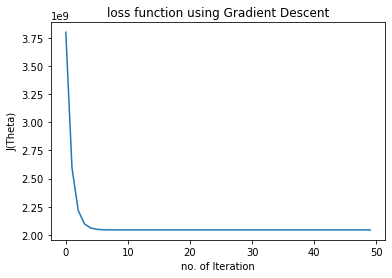

In [618]:
plt.plot(chistory1)
plt.xlabel("no. of Iteration")
plt.ylabel("J(Theta)")
plt.title("loss function using Gradient Descent")

In [656]:
def stocashtic_gradient_descent(X, y, theta, alpha, iterations):

    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        cost = 1.0
        for j in range(m):
            rand_ind = np.random.randint(0, m)
            Xi = X[rand_ind, :].reshape(1, X.shape[1])
            yi = y[rand_ind].reshape(1, 1)
            descent = (1 / m) * alpha * (Xi.transpose().dot(((np.dot(Xi, theta)) - yi)))
            theta -= descent
            cost += computeCost( Xi, yi, theta)
        cost_history[i] = cost

    return theta, cost_history

In [661]:
thetanew2,chistory2 = stocashtic_gradient_descent(X,y,theta,1,100)
print(thetanew2)

[[333857.22454677]
 [104732.15569427]
 [ -7188.6376759 ]]


Text(0.5, 1.0, 'Loss function using Gradient STOCHASTIC Descent')

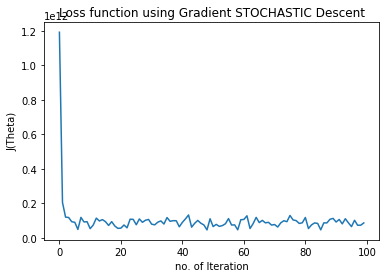

In [662]:
n_iter = 100
theta = np.random.randn(3,1)
plt.plot(range(n_iter),chistory2)
plt.xlabel("no. of Iteration")
plt.ylabel("J(Theta)")
plt.title("Loss function using Gradient STOCHASTIC Descent")

In [557]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
m = len(y_train) 


In [611]:
computeCost(X_train,y_train,thetanew1)


1654614139.0828218

In [612]:
computeCost(X_test,y_test,thetanew1)


2796320254.1728415

In [558]:
computeCost(X_train,y_train,thetanew2)


1636964355.6928473

In [559]:
computeCost(X_test,y_test,thetanew2)


2833744177.3070307

In [527]:
thetap1,phistory1 = gradientDescent(X_train,y_train,theta,0.2,50)
print(thetap1)

[[319924.75939214]
 [ 93648.11271015]
 [ -2496.78859906]]


In [525]:
thetap2,phistory2 = stocashtic_gradient_descent(X_train,y_train,theta,0.2,90)
print(thetap2)

[[321087.62748613]
 [ 91245.71339344]
 [ -3415.62095041]]


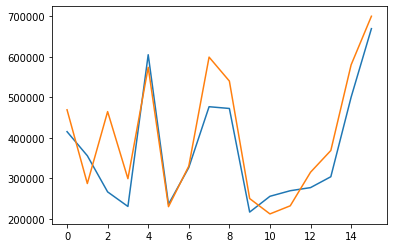

In [610]:
predictions1 = []

for i in range(0,16) :
    predict1= np.dot(thetanew1.transpose(),X_test[i])
    predictions1 = np.append(predictions1,predict1)
plt.plot(predictions1)
plt.plot(y_test)


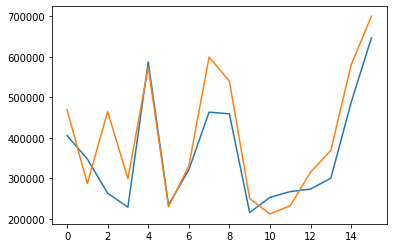

In [663]:
predictions = []

for i in range(0,16) :
    predict= np.dot(thetanew2.transpose(),X_test[i])
    predictions = np.append(predictions,predict)
plt.plot(predictions)
plt.plot(y_test)


In [485]:
eval1,ehistory1 = gradientDescent(X_test,predictions1,theta,0.08,150)
print(thetap1)
eval2,ehistory2 = gradientDescent(X_test,y_test,theta,0.08,150)

predictions = []
for i in range(0,16) :
    predict= np.dot(thetap2.transpose(),X_test[i])
    predictions = np.append(predictions,predict)
print(predictions)

[381901.00005848 336311.78918155 253740.50903145 222780.39041256
 545581.6271754  227460.40834332 305580.70764912 440592.18871572
 436872.17446306 210780.34443624 244380.47316992 250609.53324454
 262860.54397345 280369.6472658  455221.28097376 612323.81046984]


In [534]:
testtheta1,ethistory1 = gradientDescent(X_test,y_test,theta,0.1,400)
print(testtheta1)


[[376464.08973221]
 [108344.58280849]
 [ -1408.17517797]]


In [512]:
m1=len(predictions)

ypred=predictions.reshape(m1,1)
eval1,ehistory1 = gradientDescent(X_test,ypred,theta,0.08,150)
print(eval1)


[[318537.53041957]
 [ 94344.63835206]
 [ -1437.15342375]]


In [ ]:
m1=len(predictions)

ypred=predictions.reshape(m1,1)
eval1,ehistory1 = gradientDescent(X_test,ypred,theta,0.08,150)
print(eval1)


In [632]:
def computeCostR(X,y,theta,Lambda):
   
    m=len(y)
    err=((np.dot(X, theta)) - y)**2
    reg = (Lambda/(2*m)) * (sum(theta**2))
    jtheta = (np.sum(err)/(2*m)) + reg
    j_0= 1/m * (X.transpose() @ ((np.dot(X, theta)) - y))[0]
    j_1 = 1/m * (X.transpose() @((np.dot(X, theta)) - y))[1:] + (Lambda/m)* theta[1:]
    gradient= np.vstack((j_0[:,np.newaxis],j_1))
    return jtheta[0], gradient

In [373]:
def computeCostR(X,y,theta,Lambda):
   
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    cost = 1/(2*m) * np.sum(square_err)
    regcost = cost + Lambda/(2*m) * sum(theta**2)
    j_0= 1/m * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (Lambda/m)* theta[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    return regcost[0], grad


In [374]:
computeCostR(X,y,theta,0.1) 


(2195587442.501597, array([[-1754.41032517],
        [-2677.15865359],
        [ 2644.26335941]]))

In [633]:
def gradientDescentR(X,y,theta,alpha,num_iters,Lambda):
    
    m=len(y)
    history =[]
    
    for i in range(num_iters):
        cost, grad = computeCostR(X,y,theta,Lambda)
        theta = theta - (alpha * grad)
        history.append(cost)
    
    return theta , history


In [638]:
thetanew3 , chistory3 = gradientDescentR(X,y,theta,1,10,0.1)
print("The regularized theta using ridge regression:\n",thetanew3)

The regularized theta using ridge regression:
 [[340412.65957447]
 [108768.39338594]
 [ -6362.50331981]]


Text(0.5, 1.0, 'loss function using Regularized Gradient Descent')

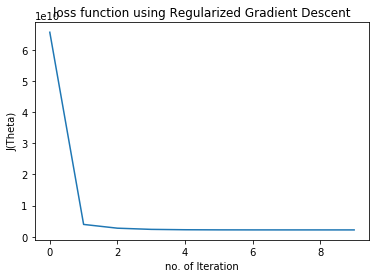

In [639]:
plt.plot(chistory3)
plt.xlabel("no. of Iteration")
plt.ylabel("J(Theta)")
plt.title("loss function using Regularized Gradient Descent")